# 이미지 인식 - 딥 러닝
## MNIST 사례

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
(X_train, Y_class_train), (X_test, Y_class_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

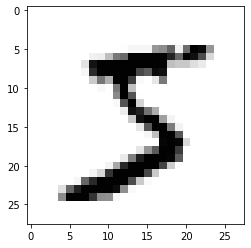

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [5]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float32')
X_train = X_train / 255

In [6]:
X_train.shape

(60000, 784)

In [7]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

In [8]:
Y_class_train[0]

5

In [9]:
Y_train = tf.keras.utils.to_categorical(Y_class_train,10)
Y_test = tf.keras.utils.to_categorical(Y_class_test,10)

In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
# seed 값 설정
seed = 0
tf.set_random_seed(seed)

In [12]:
# 입력 값을 플레이스 홀더에 저장
X = tf.placeholder(tf.float32, shape=[None, 784])
Y = tf.placeholder(tf.float32, shape=[None, 10])

In [13]:
# Layer 1
W1 = tf.Variable(tf.random_normal([784,512], dtype=tf.float32)) 
b1 = tf.Variable(tf.random_normal([512], dtype=tf.float32))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

### 아래와 같은 방법으로 하면 nan이 나옴

In [13]:
# Layer 2
W2 = tf.Variable(tf.random_normal([512,10], dtype=tf.float32)) 
b2 = tf.Variable(tf.random_normal([10], dtype=tf.float32))
hypo = tf.nn.softmax(tf.matmul(L1, W2) + b2)
#hypo = tf.matmul(L1, W2) + b2

In [14]:
# Categorical Cross Entropy
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypo), reduction_indices=[1]))
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypo, labels=Y))

### nan 이 안나오게 하는 방법

In [14]:
# Layer 2
W2 = tf.Variable(tf.random_normal([512,10], dtype=tf.float32)) 
b2 = tf.Variable(tf.random_normal([10], dtype=tf.float32))
#hypo = tf.nn.softmax(tf.matmul(L1, W2) + b2)
hypo = tf.matmul(L1, W2) + b2

In [15]:
# Categorical Cross Entropy
#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypo), reduction_indices=[1]))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypo, labels=Y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [16]:
lr = 0.1
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

In [17]:
predicted = tf.equal(tf.argmax(Y, 1), tf.argmax(hypo, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, dtype=tf.float32))

In [18]:
# 학습
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(1001):
    _, cost_train, acc_train = sess.run([train, cost, accuracy], feed_dict = {X: X_train, Y: Y_train})
    if epoch % 50 == 0:
        cost_test, acc_test = sess.run([cost, accuracy], feed_dict = {X: X_test, Y: Y_test})
        print("Epoch=%d, cost_train=%.4f, acc_train: %.4f, cost_test=%.4f, acc_test: %.4f" % 
              (epoch + 1, cost_train, acc_train, cost_test, acc_test))

Epoch=1, cost_train=222.9836, acc_train: 0.0765, cost_test=442.1791, acc_test: 0.3732
Epoch=51, cost_train=1.5993, acc_train: 0.8896, cost_test=1.6730, acc_test: 0.8889
Epoch=101, cost_train=0.5522, acc_train: 0.9105, cost_test=0.8066, acc_test: 0.9006
Epoch=151, cost_train=0.3526, acc_train: 0.9308, cost_test=0.6667, acc_test: 0.9134
Epoch=201, cost_train=0.2594, acc_train: 0.9441, cost_test=0.6147, acc_test: 0.9193
Epoch=251, cost_train=0.2025, acc_train: 0.9528, cost_test=0.5867, acc_test: 0.9230
Epoch=301, cost_train=0.1661, acc_train: 0.9596, cost_test=0.5687, acc_test: 0.9259
Epoch=351, cost_train=0.1405, acc_train: 0.9650, cost_test=0.5615, acc_test: 0.9284
Epoch=401, cost_train=0.1221, acc_train: 0.9684, cost_test=0.5576, acc_test: 0.9290
Epoch=451, cost_train=0.1080, acc_train: 0.9720, cost_test=0.5582, acc_test: 0.9308
Epoch=501, cost_train=0.0960, acc_train: 0.9747, cost_test=0.5577, acc_test: 0.9313
Epoch=551, cost_train=0.0866, acc_train: 0.9770, cost_test=0.5586, acc_test

In [19]:
# 평가
acc = sess.run(accuracy, feed_dict = {X: X_test, Y: Y_test})
print("Accuracy: %.4f" % acc)

Accuracy: 0.9411
